In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Business_Analytics_Dataset_10000_Rows.csv")
print(df.head())

   Order_ID Customer_ID  Order_Date Region Product_Category Customer_Segment  \
0         1    CUST3818  2024-08-18  North         Clothing        Corporate   
1         2    CUST9689  2024-06-19  South           Beauty      Home Office   
2         3    CUST9147  2024-11-21   West           Sports        Corporate   
3         4    CUST7938  2024-07-19  North         Clothing         Consumer   
4         5    CUST5127  2024-10-28  South   Home & Kitchen         Consumer   

   Quantity  Unit_Price  Discount_Rate  Revenue     Cost  Profit  \
0         5      300.68           0.27  1097.48   768.29  329.19   
1         9       32.89           0.02   290.09   179.33  110.76   
2         5      345.61           0.25  1296.04  1022.60  273.44   
3         1      444.50           0.06   417.83   280.99  136.84   
4         5       65.13           0.21   257.26   151.90  105.36   

  Payment_Method  
0    Credit Card  
1     Debit Card  
2    Credit Card  
3            UPI  
4    Credit Car

In [33]:
df.drop('Customer_ID',axis=1,inplace=True)
print(df.head())

   Order_ID Order_Date Region Product_Category Customer_Segment  Quantity  \
0         1 2024-08-18  North         Clothing        Corporate         5   
1         2 2024-06-19  South           Beauty      Home Office         9   
2         3 2024-11-21   West           Sports        Corporate         5   
3         4 2024-07-19  North         Clothing         Consumer         1   
4         5 2024-10-28  South   Home & Kitchen         Consumer         5   

   Unit_Price  Discount_Rate  Revenue     Cost  Profit Payment_Method  Year  \
0      300.68           0.27  1097.48   768.29  329.19    Credit Card  2024   
1       32.89           0.02   290.09   179.33  110.76     Debit Card  2024   
2      345.61           0.25  1296.04  1022.60  273.44    Credit Card  2024   
3      444.50           0.06   417.83   280.99  136.84            UPI  2024   
4       65.13           0.21   257.26   151.90  105.36    Credit Card  2024   

   Month  Day  
0      8   18  
1      6   19  
2     11   21 

In [34]:
print(df.columns)

Index(['Order_ID', 'Order_Date', 'Region', 'Product_Category',
       'Customer_Segment', 'Quantity', 'Unit_Price', 'Discount_Rate',
       'Revenue', 'Cost', 'Profit', 'Payment_Method', 'Year', 'Month', 'Day'],
      dtype='str')


In [35]:
print(df.describe())

          Order_ID                  Order_Date     Quantity    Unit_Price  \
count  10000.00000                       10000  10000.00000  10000.000000   
mean    5000.50000  2024-06-30 09:16:07.680000      5.51430    255.505222   
min        1.00000         2024-01-01 00:00:00      1.00000     10.000000   
25%     2500.75000         2024-03-31 00:00:00      3.00000    132.777500   
50%     5000.50000         2024-06-29 00:00:00      5.00000    254.995000   
75%     7500.25000         2024-09-28 00:00:00      8.00000    377.892500   
max    10000.00000         2024-12-31 00:00:00     10.00000    499.940000   
std     2886.89568                         NaN      2.86451    140.832874   

       Discount_Rate       Revenue          Cost        Profit     Year  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean        0.150272   1195.241948    776.292180    418.949768   2024.0   
min         0.000000      8.590000      5.740000      1.970000   2024.0   
25%   

In [36]:
print(df.groupby('Payment_Method')['Revenue'].sum())

Payment_Method
Cash on Delivery    2412310.37
Credit Card         2356673.37
Debit Card          2473292.21
Net Banking         2307448.77
UPI                 2402694.76
Name: Revenue, dtype: float64


In [6]:
print(df['Product_Category'].value_counts())

Product_Category
Clothing          2008
Home & Kitchen    2008
Sports            1997
Beauty            1996
Electronics       1991
Name: count, dtype: int64


In [7]:
print(df['Customer_Segment'].value_counts())

Customer_Segment
Home Office    3389
Corporate      3316
Consumer       3295
Name: count, dtype: int64


In [8]:
print(df.groupby('Product_Category')['Revenue'].sum())

Product_Category
Beauty            2427867.16
Clothing          2333518.14
Electronics       2433318.37
Home & Kitchen    2377096.07
Sports            2380619.74
Name: Revenue, dtype: float64


In [9]:
print(df.groupby('Customer_Segment')['Profit'].sum())

Customer_Segment
Consumer       1392831.22
Corporate      1400460.21
Home Office    1396206.25
Name: Profit, dtype: float64


In [37]:
print(df.isnull().sum())

Order_ID            0
Order_Date          0
Region              0
Product_Category    0
Customer_Segment    0
Quantity            0
Unit_Price          0
Discount_Rate       0
Revenue             0
Cost                0
Profit              0
Payment_Method      0
Year                0
Month               0
Day                 0
dtype: int64


In [38]:
print(df.dtypes)

Order_ID                     int64
Order_Date          datetime64[us]
Region                         str
Product_Category               str
Customer_Segment               str
Quantity                     int64
Unit_Price                 float64
Discount_Rate              float64
Revenue                    float64
Cost                       float64
Profit                     float64
Payment_Method                 str
Year                         int32
Month                        int32
Day                          int32
dtype: object


In [39]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
print(df['Order_Date'])

0      2024-08-18
1      2024-06-19
2      2024-11-21
3      2024-07-19
4      2024-10-28
          ...    
9995   2024-06-30
9996   2024-08-21
9997   2024-04-05
9998   2024-05-13
9999   2024-06-12
Name: Order_Date, Length: 10000, dtype: datetime64[us]


In [40]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

In [41]:
print(df['Order_Date'].dtype)

datetime64[us]


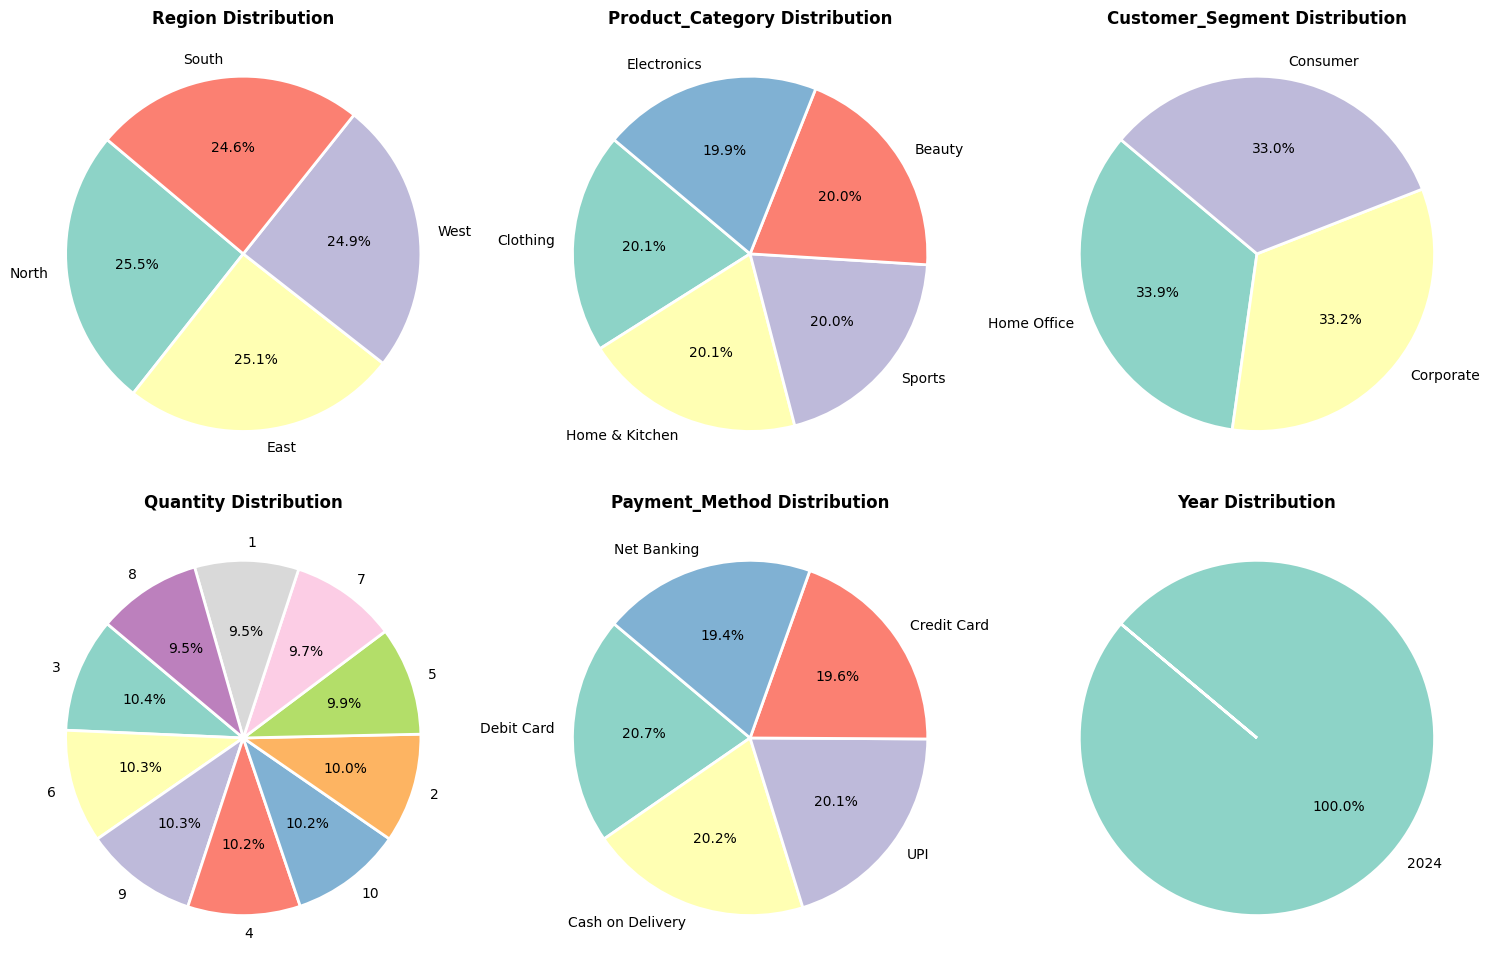

In [42]:
import math

def plot_all_pie(df,title_prefix=""):
    pie_cols = [col for col in df.columns if df[col].nunique() <= 10]

    n_cols = 3
    n_rows = math.ceil(len(pie_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,5*n_rows))

    for i,col in enumerate(pie_cols,1):
        plt.subplot(n_rows,n_cols,i)
        
        data = df[col].value_counts()

        plt.pie(data,
                labels=data.index,
                autopct='%1.1f%%',
                startangle=140,
                colors = sns.color_palette('Set3'),
                wedgeprops={'edgecolor':'white','linewidth':2}
            )
        
        plt.title(f"{title_prefix}{col} Distribution",fontsize=12,fontweight='bold')
        plt.tight_layout()

plot_all_pie(df)


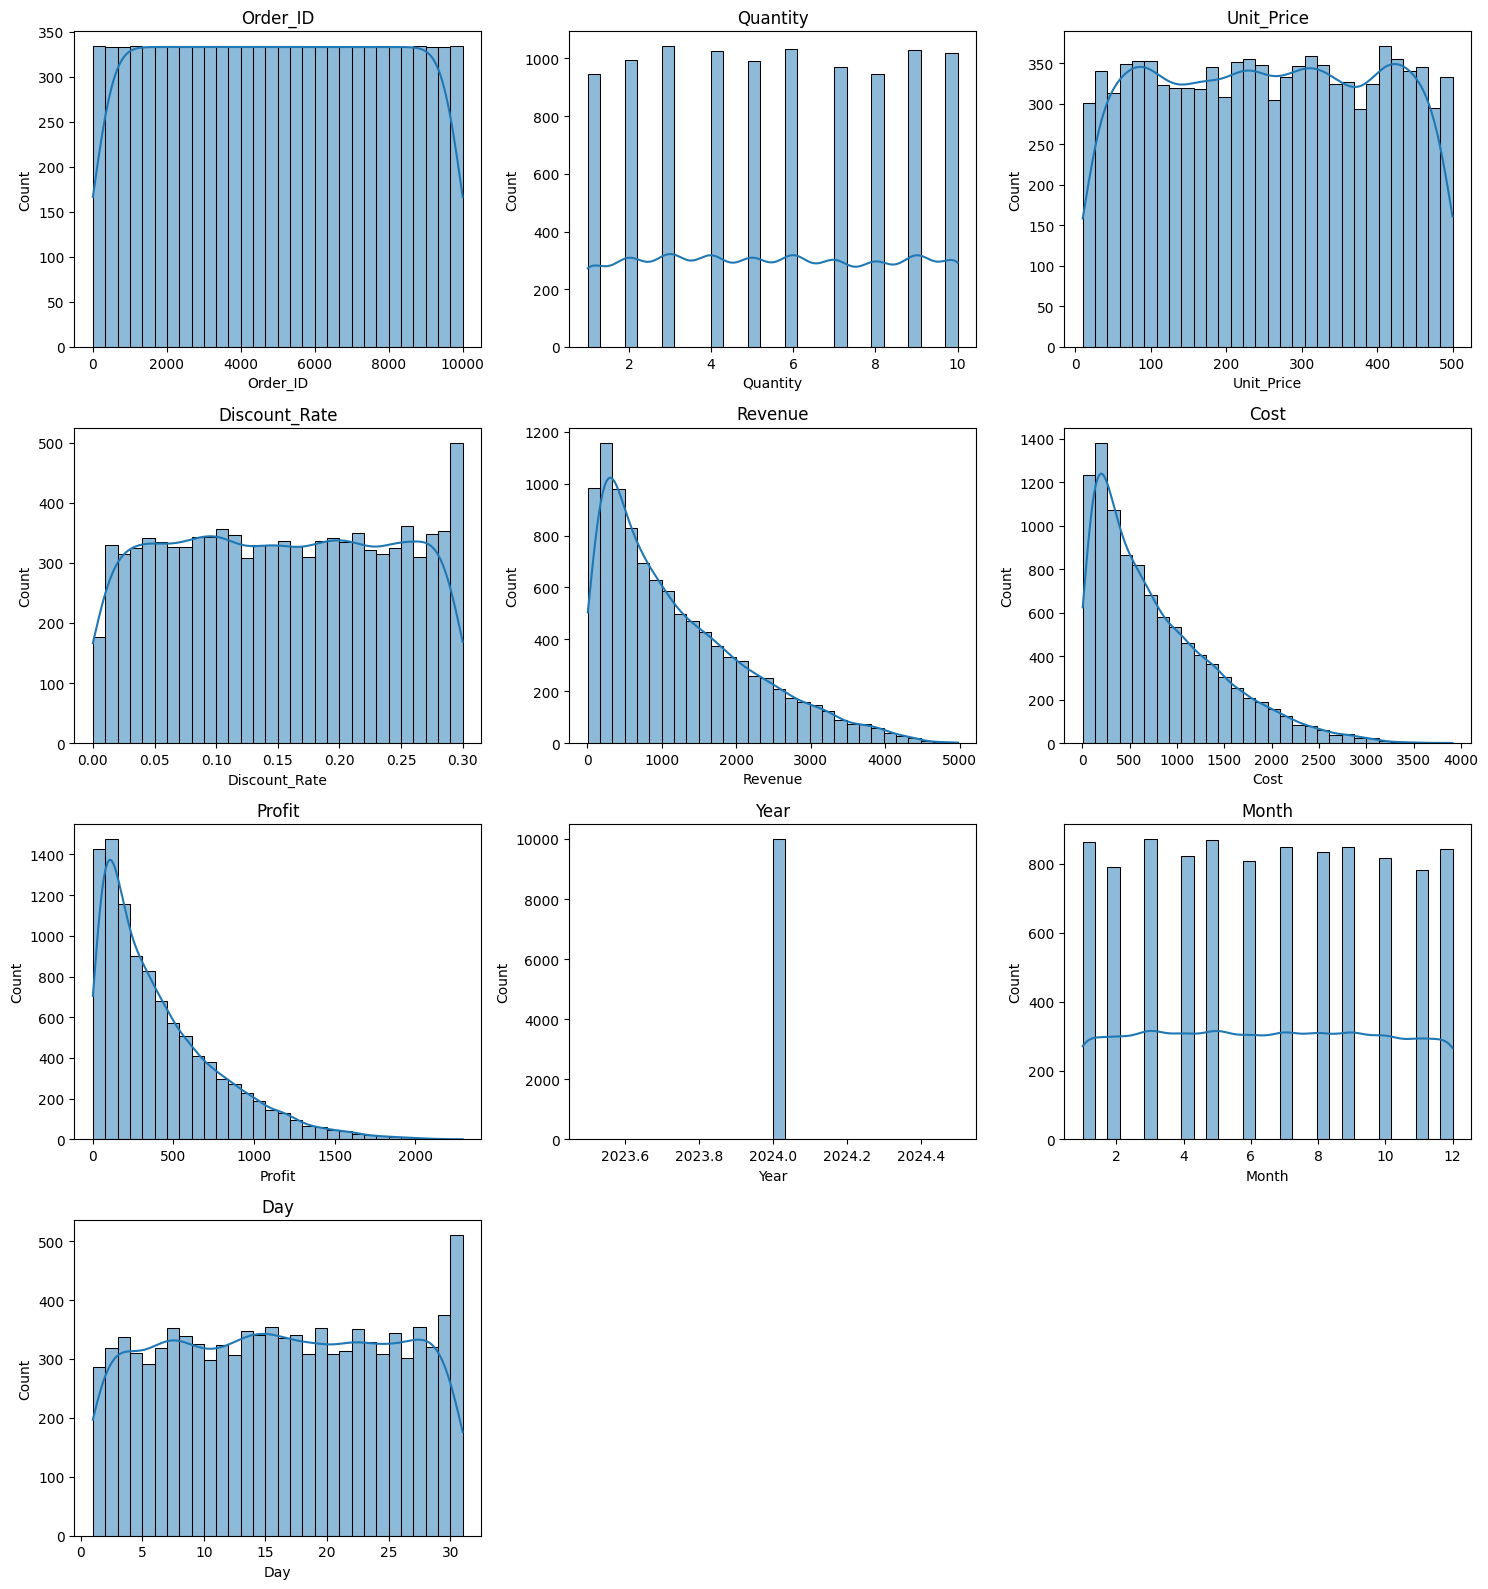

In [43]:
def plot_all_hist(df,title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,4*n_rows))
    for i,col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],kde=True,bins=30)
        plt.title(f"{title_prefix}{col}")

    plt.tight_layout()
    plt.show()

plot_all_hist(df)


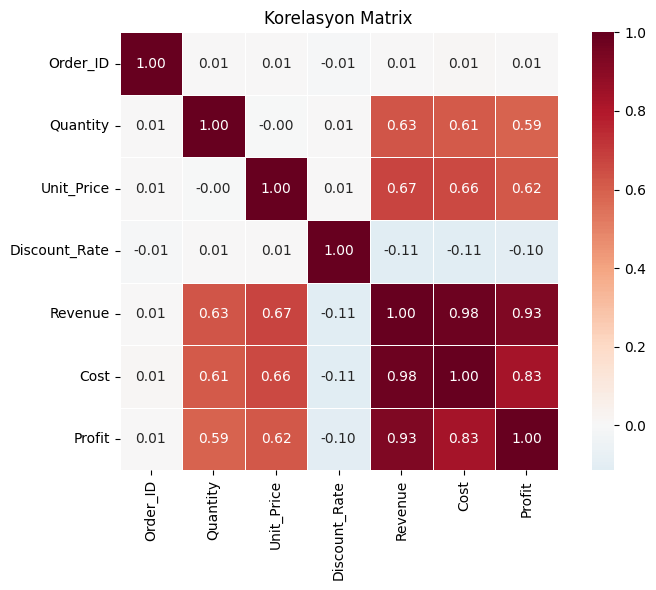


 Highest Correlations with Profit:
Revenue          0.929501
Cost             0.832131
Unit_Price       0.623346
Quantity         0.587836
Order_ID         0.008100
Discount_Rate   -0.103951
Name: Profit, dtype: float64


In [44]:
num_cols = df.select_dtypes(include=['int64','float']).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='RdBu_r',center=0,fmt='.2f',square=True,linewidths=0.5,vmax=1)

plt.title('Korelasyon Matrix')
plt.tight_layout()
plt.show()

print("\n Highest Correlations with Profit:")
print(corr['Profit'].drop('Profit').sort_values(ascending=False))

  Order_ID             =>     0 outlier (%0.0)
  Quantity             =>     0 outlier (%0.0)
  Unit_Price           =>     0 outlier (%0.0)
  Discount_Rate        =>     0 outlier (%0.0)
  Revenue              =>   153 outlier (%1.5)
  Cost                 =>   218 outlier (%2.2)
  Profit               =>   291 outlier (%2.9)


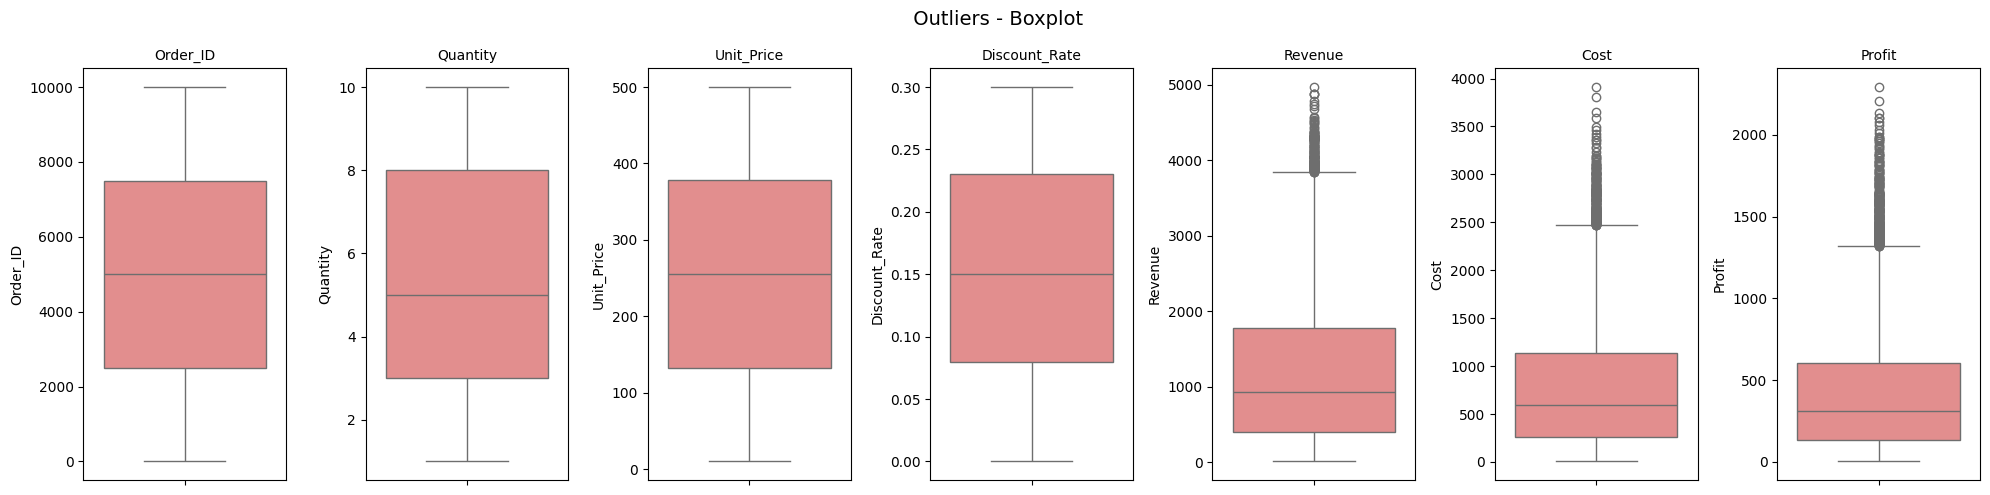

In [18]:
def find_outliers_iqr(series,threshold=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1

    lower = q1-threshold * iqr
    upper = q3+threshold * iqr

    outliers = series[(series < lower) | (series > upper)]

    count = outliers.shape[0]
    pct = 100 * count / series.shape[0]

    return count,pct

for col in num_cols:
    count, pct = find_outliers_iqr(df[col])
    print(f"  {col:20s} => {count:5d} outlier (%{pct:.1f})")

fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col, fontsize=10)
plt.suptitle(' Outliers - Boxplot', fontsize=14)
plt.tight_layout()
plt.show()

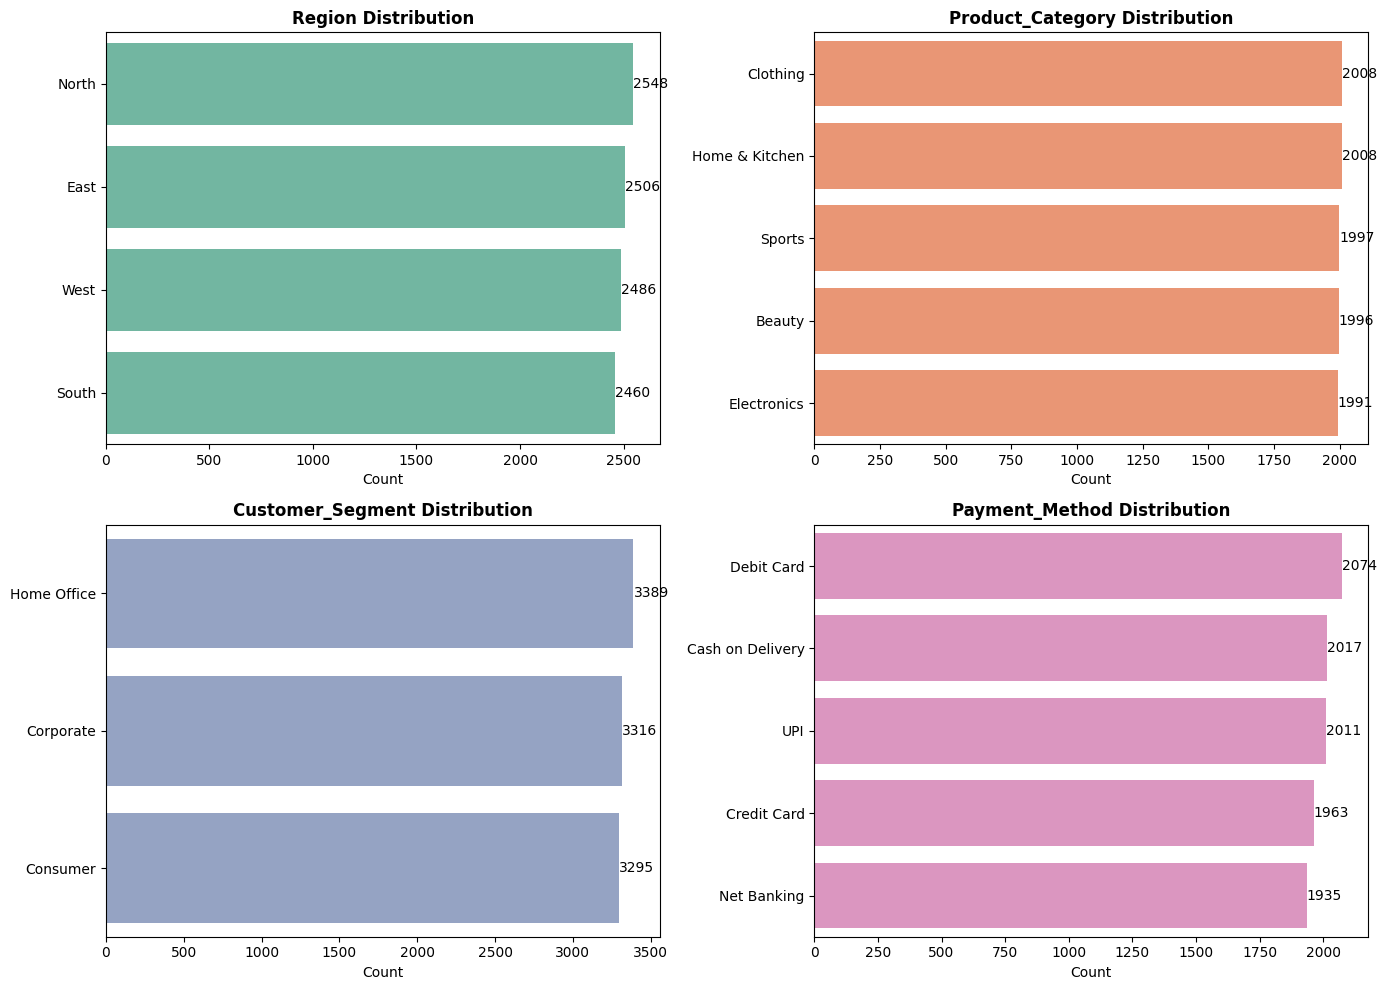

In [48]:
cat_cols = ['Region', 'Product_Category', 
            'Customer_Segment', 'Payment_Method']

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()

    sns.barplot(
        x=counts.values,
        y=counts.index,
        ax=axes[i],
        color=colors[i]
    )

    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")
    axes[i].bar_label(axes[i].containers[0], fmt='%d')

plt.tight_layout()
plt.show()

In [49]:
def show_value_counts(df,cat_cols):
    for col in cat_cols:
        print(f"\n{col}")
        print("---------")
        print(df[col].value_counts())

show_value_counts(df,cat_cols)


Region
---------
Region
North    2548
East     2506
West     2486
South    2460
Name: count, dtype: int64

Product_Category
---------
Product_Category
Clothing          2008
Home & Kitchen    2008
Sports            1997
Beauty            1996
Electronics       1991
Name: count, dtype: int64

Customer_Segment
---------
Customer_Segment
Home Office    3389
Corporate      3316
Consumer       3295
Name: count, dtype: int64

Payment_Method
---------
Payment_Method
Debit Card          2074
Cash on Delivery    2017
UPI                 2011
Credit Card         1963
Net Banking         1935
Name: count, dtype: int64


In [50]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

df_encoded

,Order_ID,Order_Date,Quantity,Unit_Price,Discount_Rate,Revenue,Cost,Profit,Year,Month,...,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home & Kitchen,Product_Category_Sports,Customer_Segment_Corporate,Customer_Segment_Home Office,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI
0,1,2024-08-18,5,300.68,0.27,1097.48,768.29,329.19,2024,8,...,1,0,0,0,1,0,1,0,0,0
1,2,2024-06-19,9,32.89,0.02,290.09,179.33,110.76,2024,6,...,0,0,0,0,0,1,0,1,0,0
2,3,2024-11-21,5,345.61,0.25,1296.04,1022.60,273.44,2024,11,...,0,0,0,1,1,0,1,0,0,0
3,4,2024-07-19,1,444.50,0.06,417.83,280.99,136.84,2024,7,...,1,0,0,0,0,0,0,0,0,1
4,5,2024-10-28,5,65.13,0.21,257.26,151.90,105.36,2024,10,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2024-06-30,3,210.14,0.09,573.68,422.90,150.78,2024,6,...,0,0,0,0,0,1,1,0,0,0
9996,9997,2024-08-21,3,332.67,0.13,868.27,544.27,324.00,2024,8,...,1,0,0,0,0,1,1,0,0,0
9997,9998,2024-04-05,5,440.10,0.01,2178.49,1464.86,713.63,2024,4,...,1,0,0,0,1,0,0,0,1,0
9998,9999,2024-05-13,10,303.63,0.17,2520.13,1455.60,1064.53,2024,5,...,0,0,0,1,0,1,0,0,0,0


In [52]:
df_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order_ID                         10000 non-null  int64         
 1   Order_Date                       10000 non-null  datetime64[us]
 2   Quantity                         10000 non-null  int64         
 3   Unit_Price                       10000 non-null  float64       
 4   Discount_Rate                    10000 non-null  float64       
 5   Revenue                          10000 non-null  float64       
 6   Cost                             10000 non-null  float64       
 7   Profit                           10000 non-null  float64       
 8   Year                             10000 non-null  int32         
 9   Month                            10000 non-null  int32         
 10  Day                              10000 non-null  int32         
 11  R

In [53]:
df_encoded.drop('Order_Date',axis=1,inplace=True)